<a href="https://colab.research.google.com/github/shravanipp/superstore/blob/main/superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import kagglehub


In [ ]:
df = pd.read_csv("data.csv", encoding="latin-1")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

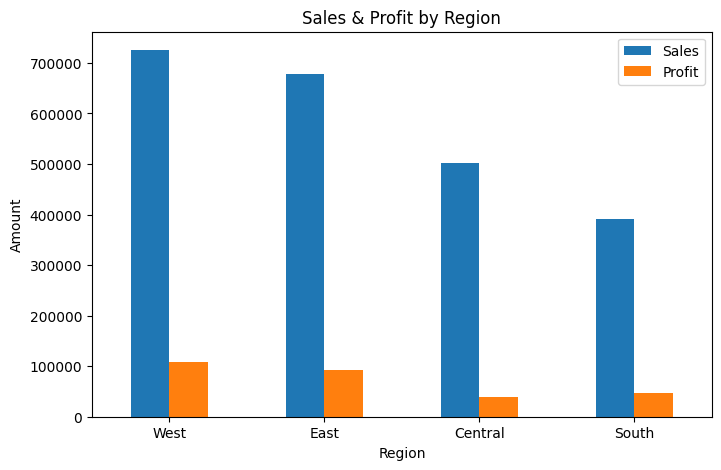

In [ ]:
#1.Sales and profit are highest in the West region.
region_perf = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
region_perf.plot(kind='bar', figsize=(8,5))
plt.title('Sales & Profit by Region')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.show()


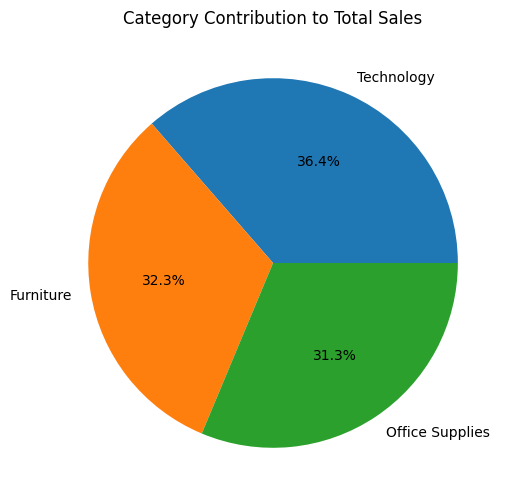

In [ ]:
#2.Technology category contributes maximum revenue.
cat_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
cat_sales.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Category Contribution to Total Sales')
plt.ylabel('')
plt.show()


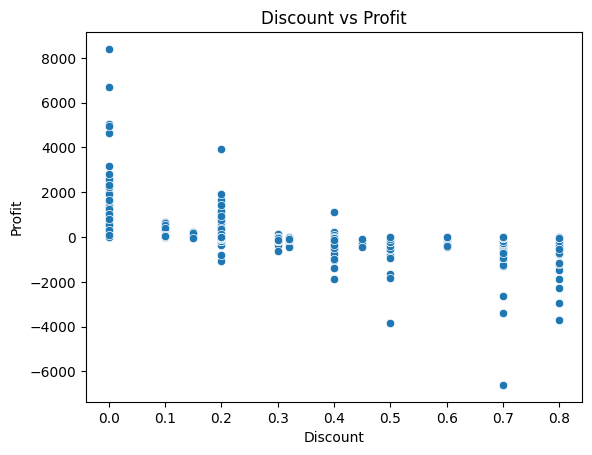

Correlation (Discount vs Profit): -0.21948745637176803


In [ ]:
#3.High discounts reduce profit margins significantly.
sns.scatterplot(data=df, x='Discount', y='Profit')
plt.title('Discount vs Profit')
plt.show()

print("Correlation (Discount vs Profit):", df['Discount'].corr(df['Profit']))


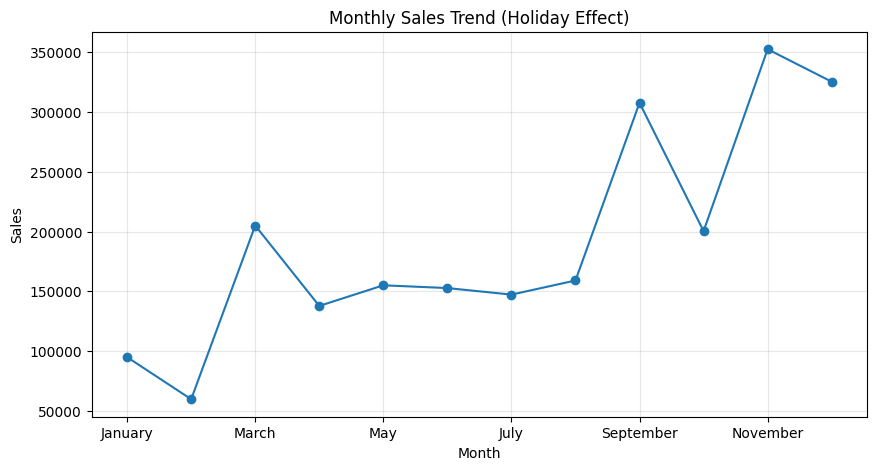

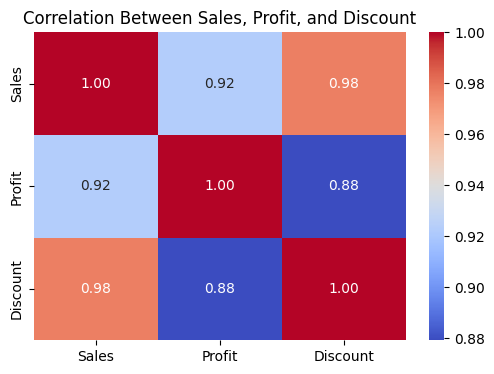

In [ ]:
#4. November and December show peak sales (holiday effect)

# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Group by month and calculate total sales
monthly_sales = df.groupby(df['Order Date'].dt.month_name())['Sales'].sum()

# Reorder months in calendar order
monthly_sales = monthly_sales.reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

# --- Line Chart: Monthly Sales Trend ---
plt.figure(figsize=(10,5))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend (Holiday Effect)')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.grid(True, alpha=0.3)
plt.show()

# --- Correlation Heatmap: Sales, Profit, Discount ---
# Create a monthly summary DataFrame for correlation
monthly_summary = df.groupby(df['Order Date'].dt.month_name())[['Sales', 'Profit', 'Discount']].sum().reset_index()

# Reorder month names for proper display
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
monthly_summary['Order Date'] = pd.Categorical(monthly_summary['Order Date'], categories=month_order, ordered=True)
monthly_summary = monthly_summary.sort_values('Order Date')

# Compute correlation
corr = monthly_summary[['Sales', 'Profit', 'Discount']].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sales, Profit, and Discount')
plt.show()




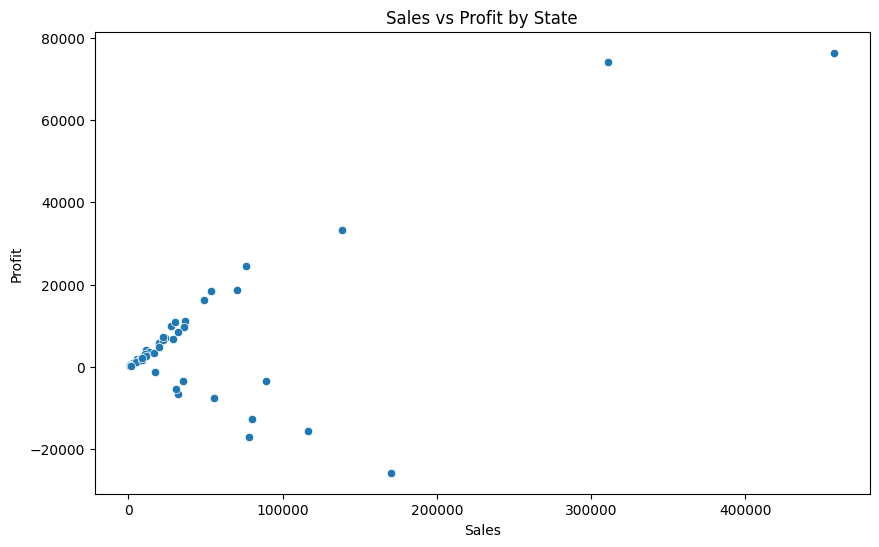

In [ ]:
#5.Some states have high sales but low profit — need pricing strategy review.
state_perf = df.groupby('State')[['Sales','Profit']].sum()
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sales', y='Profit', data=state_perf)
plt.title('Sales vs Profit by State')
plt.show()

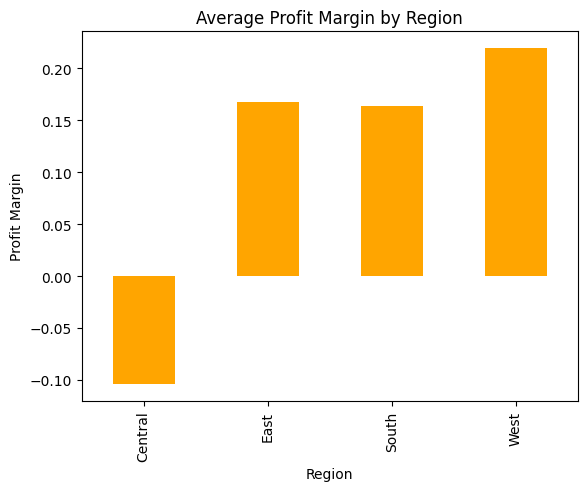

In [ ]:
#6.The Central region underperforms — needs targeted marketing.
# Calculate Profit Margin
df['Profit Margin'] = df['Profit'] / df['Sales']

region_margin = df.groupby('Region')['Profit Margin'].mean()
region_margin.plot(kind='bar', color='orange')
plt.title('Average Profit Margin by Region')
plt.ylabel('Profit Margin')
plt.show()

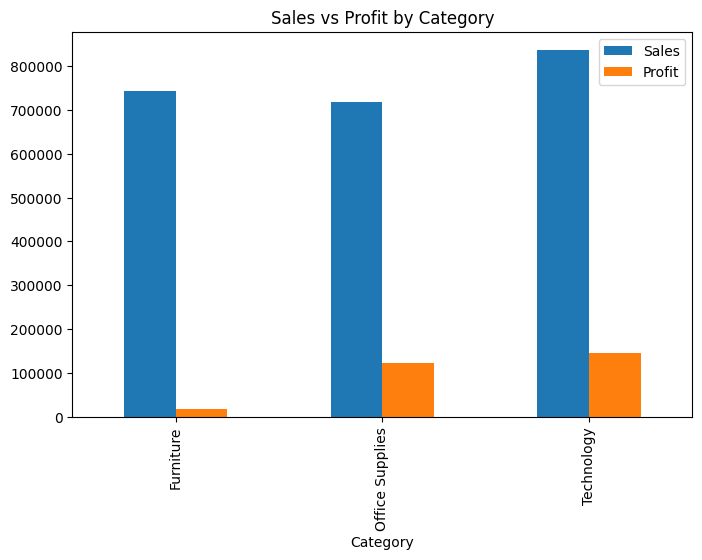

In [ ]:
#7.Furniture category shows high sales but low profit.
cat_perf = df.groupby('Category')[['Sales','Profit']].sum()
cat_perf.plot(kind='bar', figsize=(8,5))
plt.title('Sales vs Profit by Category')
plt.show()


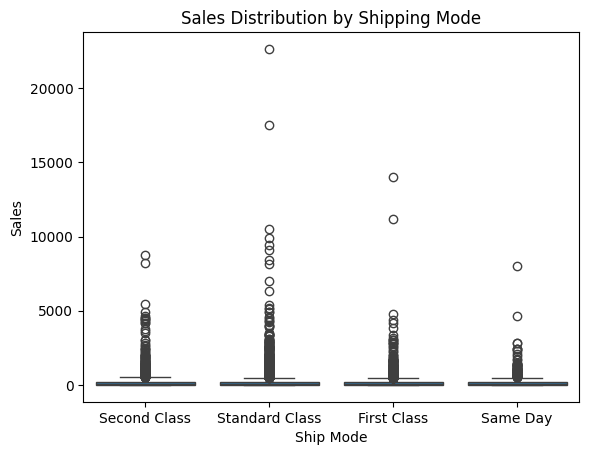

In [ ]:
#8.Customers prefer Standard Class shipping for bulk orders.
sns.boxplot(data=df, x='Ship Mode', y='Sales')
plt.title('Sales Distribution by Shipping Mode')
plt.show()


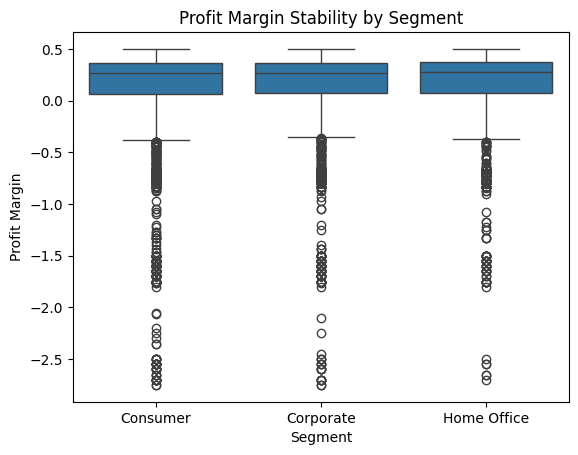

In [ ]:
#9.Profit margin is more stable in Corporate segment.
sns.boxplot(data=df, x='Segment', y='Profit Margin')
plt.title('Profit Margin Stability by Segment')
plt.show()


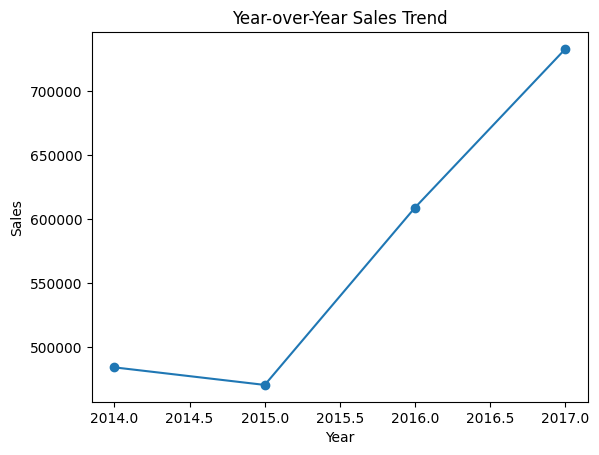

In [ ]:
#10.Overall sales are increasing year-over-year.
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum()
yearly_sales.plot(kind='line', marker='o')
plt.title('Year-over-Year Sales Trend')
plt.ylabel('Sales')
plt.show()